#1.
מה היתרונות ומה החסרונות של שימוש במידע גולמי מהלקוח ללא עיבוד או
ניקוי

יתרנות - חיסכון מידע, זמינות מידע וחיסכון בכסף
חסרונות - טעויות בעיבוד המידע ומידע לא אמין

#.2 אילו סוגי טעויות עלולות להופיע במידע גולמי שמגיע מהלקוח, וכיצד ניתן
לזהות ולתקן אותן?

נתונים חסרים, לא נכונים ושגויים
כפילויות

#.3 קיבלת תשובות משוב מסקר שערכת לחברת מים מינרלים המכיל: מס' לקוח,
תאריך המשוב, מקום מגורים וציון מספרי של איכות השירות )בין 1-10(.
בחלק מהרשומות חסר תאריך, הצע דרך פתרון להשלמת המידע
בחלק מהרשומות חסר מקום מגורים, הצע דרך פתרון להשלמת המידע.
בחלק מהרשומות מופיע פעמיים או יותר רשומות עם אותו מס' לקוח, הצע דרך
פתרון לבעיה.
בחלק מהמקומות חסר הציון המספרי- הצע 3 רעיונות )לפחות( להשלמת הציון

א. בשביל הוספת תאריך אפשר להוסיף טיימסטמפ

ב. אפשר למצוא את המקום מגורים שמופיע הכי הרבה פעמים ולהשלים איתו את המקומות החסרים.

ג. אפשר לחבר כפילים על ידי השם ואז לקחת את השורה עם הכי פחות חוסרים ולמחוק את שאר הכפילויות ולשים לב שהכפילויות נמחקות בשאר הטבלאות הרלוונטיות

ד. אפשר להשלים את הציון החסר על ידי, ממוצע, ציון מקסימלי או חציון



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [479]:
data = pd.DataFrame([
{"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
{"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
{"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 8},
{"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
{"cust_id": 2, "timestamp": "2024-01-05", "residence": "Jerusalem", "grade": None}
])
print('4.')

print('A.')
dup_cust = data[data['cust_id'].duplicated(keep=False)].sort_values('cust_id')
display('duplicated', dup_cust)
dup_cust.drop_duplicates(subset=['cust_id'], keep='first', inplace=True)
display('kept', dup_cust)

print('B.')
# contanis_nan = data[data.isna().sum(axis=1) > 0]
# display(data.drop(contanis_nan))
contains_nan = data[data.isna().sum(axis=1) > 0]
display('dropped nan', data.drop(contains_nan.index))

print('C.')
avg_grade = data['grade'].mean()
data['grade'] = data['grade'].fillna(avg_grade)
print('avg grade', avg_grade)
display(data)

print('D.')
data2 = pd.DataFrame([
{"cust_id": 1, "timestamp": "2024-01-01", "residence": "Tel Aviv", "grade": 8},
{"cust_id": 2, "timestamp": "2024-01-02", "residence": "Jerusalem", "grade": None},
{"cust_id": 1, "timestamp": "2024-01-03", "residence": "Tel Aviv", "grade": 8},
{"cust_id": 3, "timestamp": "2024-01-04", "residence": None, "grade": 7},
{"cust_id": 2, "timestamp": "2024-01-05", "residence": "Jerusalem", "grade": None}
])
print('------ Done Above------')

print('E.')
data2['grade'] = data2.groupby('residence')['grade'].apply(
    lambda kvutza: kvutza.fillna(kvutza.mean() if kvutza.notna().any() else data2['grade'].mean())
).reset_index(level=0, drop=True)

display(data2)

4.
A.


'duplicated'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
2,1,2024-01-03,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,NaN
4,2,2024-01-05,Jerusalem,NaN


'kept'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
1,2,2024-01-02,Jerusalem,NaN


B.


'dropped nan'

,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.0
2,1,2024-01-03,Tel Aviv,8.0


C.
avg grade 7.666666666666667


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.000000
1,2,2024-01-02,Jerusalem,7.666667
2,1,2024-01-03,Tel Aviv,8.000000
3,3,2024-01-04,None,7.000000
4,2,2024-01-05,Jerusalem,7.666667


D.
------ Done Above------
E.


,cust_id,timestamp,residence,grade
0,1,2024-01-01,Tel Aviv,8.000000
1,2,2024-01-02,Jerusalem,7.666667
2,1,2024-01-03,Tel Aviv,8.000000
3,3,2024-01-04,None,NaN
4,2,2024-01-05,Jerusalem,7.666667


In [252]:
print('PART C')
print('5.')
customers_df = pd.read_csv('customers.csv')
items_df = pd.read_csv('items.csv')
order_item_df = pd.read_csv('order_item.csv')
orders_df = pd.read_csv('orders.csv')

print('A.')
print(customers_df.info())
print(items_df.info())
print(order_item_df.info())
print(orders_df.info())

print('B.')
print(customers_df.describe())
print(items_df.describe())
print(order_item_df.describe())
print(orders_df.describe())

print('C.')
print(customers_df.head(5))
print(items_df.head(5))
print(order_item_df.head(5))
print(orders_df.head(5))

print('6.')
items_df['amount of non nans'] = items_df.notna().sum(axis=1)
items_df.sort_values(['item_name', 'amount of non nans'], inplace=True, ascending=[True, False])
display(items_df.drop_duplicates(subset=['item_name'], keep='first'))

print('7.') 
dup_items = items_df[items_df['item_name'].duplicated(keep=False)].sort_values('item_name')
dup_items.sort_values(['item_name', 'amount of non nans'], inplace=True, ascending=[True, False])
display('amount of non nans', dup_items)
kept = dup_items.drop_duplicates(subset=['item_name'], keep='first')
display('kept', kept)

removed = dup_items[~dup_items['id'].isin(kept['id'])]
display('removed', removed)

dup_items.drop_duplicates(subset=['item_name'], keep='first', inplace=True)
display('after removed', dup_items)

merged_dup = removed.merge(kept, how='inner', on='item_name', suffixes=('_removed', '_kept'))
display(merged_dup)
mapping = dict(zip(merged_dup['id_removed'], merged_dup['id_kept']))
print('kept', kept['id'].values)
print('removed', removed['id'].values)
pd.reset_option('display.max_rows', None)
order_item_df['id'] = order_item_df['id'].replace(mapping)
display(order_item_df)

print('8.')
drop_3_plus_nans = customers_df[customers_df.isna().sum(axis=1) <= 3]
display('dropped 3+ nans', drop_3_plus_nans)

print('9.')
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================



5.
A.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   first_name    494 non-null    object 
 2   last_name     494 non-null    object 
 3   gender        447 non-null    object 
 4   age           475 non-null    float64
 5   nationallity  494 non-null    object 
 6   joining_date  439 non-null    object 
 7   phone_number  500 non-null    object 
 8   email         500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     int64  
 1   item_name          50 non-null     object 
 2   item_category      39 non-null     object 
 3   it

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False,5
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True,7
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True,7
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True,7
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
14,21,External Hard Drive,Computers and Accessories,1251.36,1013.0,Microsoft,True,7


7.


'amount of non nans'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
13,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6
12,16,Drone,NaN,3949.97,850.0,NaN,True,5
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False,6
18,8,Headphone,NaN,3117.19,599.0,NaN,True,5


'kept'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False,6
21,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True,7
30,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True,7
31,17,Smart Watch,Televisions and Displays,312.88,685.0,Canon,True,7
33,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True,7
36,50,Speaker,Audio Equipment,4453.90,937.0,Logitech,True,7
39,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,7


'removed'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7
13,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6
12,16,Drone,NaN,3949.97,850.0,NaN,True,5
18,8,Headphone,NaN,3117.19,599.0,NaN,True,5
22,43,Laptop,Computers and Accessories,4153.61,1018.0,Dell,True,7
29,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True,7
32,14,Smart Watch,NaN,2007.43,742.0,NaN,True,5
34,45,Smartphone,Mobile Devices and Accessories,3513.56,1162.0,Panasonic,True,7


'after removed'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
19,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False,6
21,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True,7
30,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True,7
31,17,Smart Watch,Televisions and Displays,312.88,685.0,Canon,True,7
33,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True,7
36,50,Speaker,Audio Equipment,4453.90,937.0,Logitech,True,7
39,46,Tablet,Mobile Devices and Accessories,1606.65,267.0,HP,True,7


,id_removed,item_name,item_category_removed,item_price_removed,stock_quantity_removed,item_brand_removed,item_availability_removed,amount of non nans_removed,id_kept,item_category_kept,item_price_kept,stock_quantity_kept,item_brand_kept,item_availability_kept,amount of non nans_kept
0,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7,7,Photography Equipment,2366.72,458.0,Microsoft,True,7
1,28,Camera,NaN,695.71,NaN,Sony,False,5,7,Photography Equipment,2366.72,458.0,Microsoft,True,7
2,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7,3,Computers and Accessories,1121.84,334.0,HP,True,7
3,10,Drone,Televisions and Displays,453.85,605.0,NaN,True,6,24,Televisions and Displays,4449.99,443.0,Samsung,True,7
4,16,Drone,NaN,3949.97,850.0,NaN,True,5,24,Televisions and Displays,4449.99,443.0,Samsung,True,7
5,8,Headphone,NaN,3117.19,599.0,NaN,True,5,49,Audio Equipment,1317.56,NaN,Sony,False,6
6,43,Laptop,Computers and Accessories,4153.61,1018.0,Dell,True,7,2,Computers and Accessories,1851.32,493.0,HP,True,7
7,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True,7,47,Printers and Office Equipment,3704.16,239.0,Toshiba,True,7
8,14,Smart Watch,NaN,2007.43,742.0,NaN,True,5,17,Televisions and Displays,312.88,685.0,Canon,True,7
9,45,Smartphone,Mobile Devices and Accessories,3513.56,1162.0,Panasonic,True,7,4,Mobile Devices and Accessories,965.20,201.0,Bose,True,7


kept [ 7  3 24 49  2 47 17  4 50 46  1]
removed [48 28 44 10 16  8 43  6 14 45  9  5 40 42]


,id,order_id,item_id,quantity
0,1,337,10.0,2
1,2,430,27.0,6
2,3,430,36.0,2
3,4,508,46.0,1
4,46,229,27.0,2
...,...,...,...,...
995,996,594,24.0,2
996,997,330,32.0,8
997,998,472,10.0,3
998,999,222,29.0,1


8.


'dropped 3+ nans'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


9.
PART D
1.


'customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


'items'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False,5
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True,7
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True,7
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True,7
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7


'order item'

,id,order_id,item_id,quantity
0,1,337,10.0,2
1,2,430,27.0,6
2,3,430,36.0,2
3,4,508,46.0,1
4,46,229,27.0,2
...,...,...,...,...
995,996,594,24.0,2
996,997,330,32.0,8
997,998,472,10.0,3
998,999,222,29.0,1


'orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


In [414]:
print('PART D')
print('1.')
average_price_per_item = items_df.groupby('item_name')['item_price'].mean()
display(average_price_per_item)

print('2.')
merged_df = pd.merge(order_item_df, orders_df, on='order_id')
customer_item_counts = merged_df.groupby('customer_id').size()
top_customer_count = customer_item_counts.max()
top_customer_df = customers_df[customers_df['id'] == top_customer_id]
top_customer_first_name = top_customer_df['first_name'].values[0]
top_customer_last_name = top_customer_df['last_name'].values[0]
print(f"The customer who purchased the most items is {top_customer_first_name} {top_customer_last_name} with {top_customer_count} items.")

print('3.')
pd.reset_option('display.max_rows', None)
merged_quantity_price = items_df.merge(order_item_df, how='left', left_on='id', right_on='item_id')
new_merged_quantity_price = merged_quantity_price[['id_x', 'item_price', 'item_id', 'quantity']]
new_merged_quantity_price['total_price'] = new_merged_quantity_price['quantity'] * new_merged_quantity_price['item_price']
total_price_col = new_merged_quantity_price['total_price']
order_item_df['total_price'] = total_price_col
display(order_item_df)

print('4.')
merged_orders_order_id = orders_df.merge(order_item_df, how='left', on='order_id')
display(merged_orders_order_id[['order_id', 'customer_id', 'delivery_address', 'delivery_days', 'order_date', 'payment_method',	'order_source', 'total_price']])

print('5.')
display('most expensive order', order_item_df['total_price'].max())
display('cheapest order', order_item_df['total_price'].min())
display('average order value', order_item_df['total_price'].mean())

print('6.')
pivot_table = customers_df.pivot_table(
    index='nationallity',
    columns='gender',
    values='id',
    aggfunc='count',
    fill_value=0
)
display(pivot_table)


display('customers', customers_df)
display('items', items_df)
display('order item', order_item_df)
display('orders', orders_df)

PART D
1.


item_name
Action Camera          2694.250000
Antivirus Software     4186.620000
Blu-Ray Player         3382.860000
Camcorder               860.010000
Camera                 1700.503333
Computer Monitor       4076.350000
Dash Camera            1283.990000
Desktop                 922.715000
Drone                  2951.270000
External Hard Drive    1251.360000
Fitness Tracker        2997.290000
Gaming Chair            417.160000
HDMI Cable             1710.840000
Headphone              2217.375000
Keyboard                604.180000
Laptop                 3002.465000
Micro SD Card          3238.230000
Modem                  3256.880000
Mouse                  1333.040000
Office Software        3454.820000
Portable Charger       1523.270000
Power Strip            3344.900000
Printer                3940.075000
Smart Watch            1160.155000
Smartphone             2239.380000
Speaker                4462.585000
Surge Protector         488.390000
Tablet                 2173.130000
Television

2.
The customer who purchased the most items is Merill Lacroutz with 15 items.
3.


C:\Users\tonim\AppData\Local\Temp\ipykernel_19032\2412644525.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_quantity_price['total_price'] = new_merged_quantity_price['quantity'] * new_merged_quantity_price['item_price']


,id,order_id,item_id,quantity,total_price
0,1,337,10.0,2,5388.50
1,2,430,27.0,6,18859.75
2,3,430,36.0,2,2694.25
3,4,508,46.0,1,8082.75
4,46,229,27.0,2,13471.25
...,...,...,...,...,...
995,996,594,24.0,2,NaN
996,997,330,32.0,8,NaN
997,998,472,10.0,3,NaN
998,999,222,29.0,1,NaN


4.


,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,3213.30
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,4471.27
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,19749.85
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,1391.42
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,1333.04
...,...,...,...,...,...,...,...,...
1152,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE,NaN
1153,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,13531.44
1154,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,10148.58
1155,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE,12527.97


5.


'most expensive order'

40241.43000000001

'cheapest order'

241.54

'average order value'

6728.2549895833345

6.


gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1,0,10,1,0,9,0,1
Brazil,0,0,6,0,0,17,2,1
Chile,1,0,14,0,0,9,0,0
China,0,0,5,1,1,9,0,1
France,1,0,15,1,0,10,0,0
Germany,0,0,12,0,0,3,0,1
India,1,0,8,0,0,15,0,0
Isreal,2,1,20,5,1,31,0,2
Italy,0,0,15,0,2,11,0,0


'customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


'items'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False,6
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False,5
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True,7
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True,7
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
6,28,Camera,NaN,695.71,NaN,Sony,False,5
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True,7
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7


'order item'

,id,order_id,item_id,quantity,total_price
0,1,337,10.0,2,5388.50
1,2,430,27.0,6,18859.75
2,3,430,36.0,2,2694.25
3,4,508,46.0,1,8082.75
4,46,229,27.0,2,13471.25
...,...,...,...,...,...
995,996,594,24.0,2,NaN
996,997,330,32.0,8,NaN
997,998,472,10.0,3,NaN
998,999,222,29.0,1,NaN


'orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


graphs part
1.


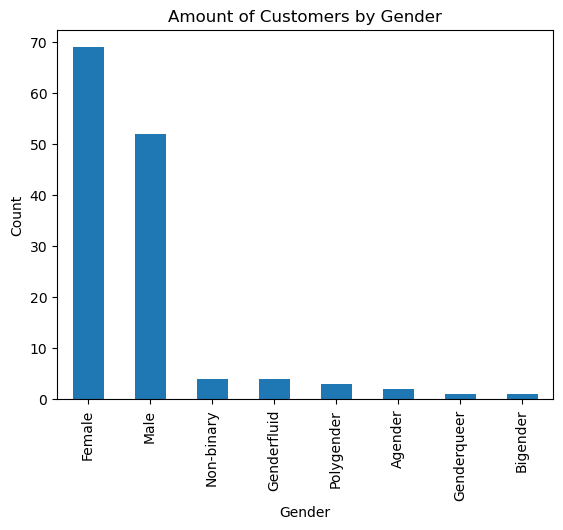

2.


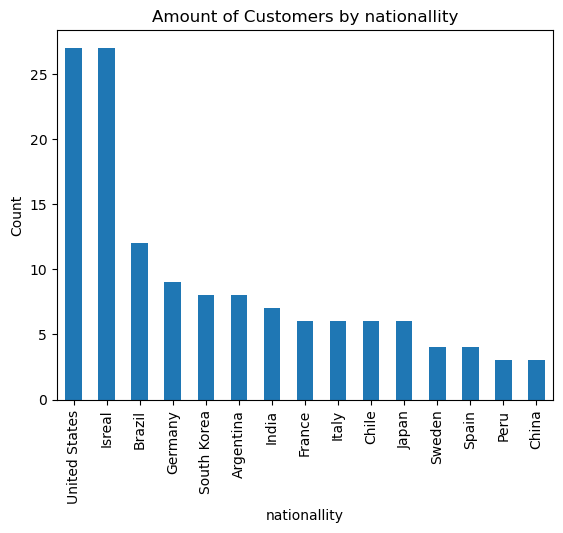

3.


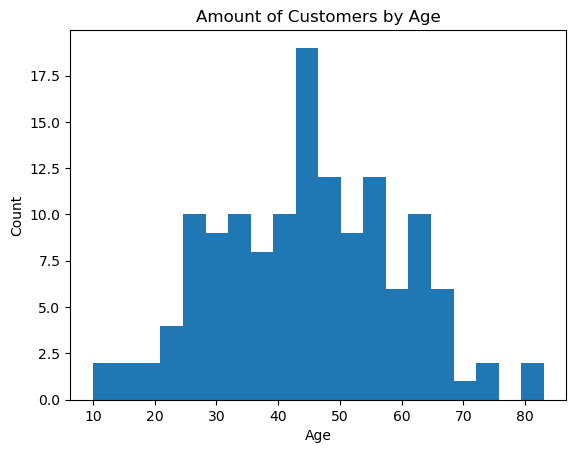

4.


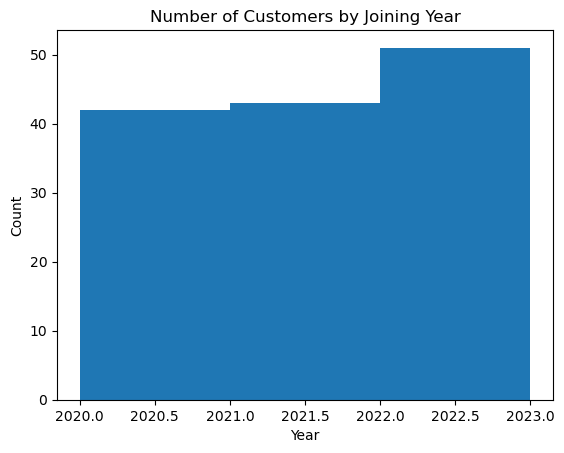

5.


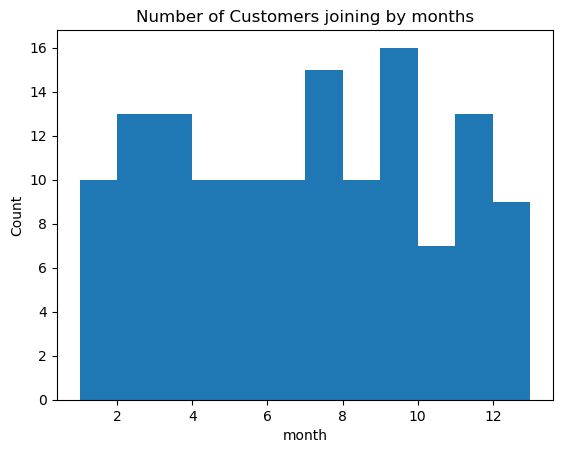

6.


'customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email,joining_year,joining_month
0,1,Eadie,Maffeo,Female,41.0,France,2022-11-01,534-341-9052,emaffeo0@smh.com.au,2022,11
5,6,Janine,Voak,Female,52.0,United States,2020-02-08,589-929-6244,jvoak5@php.net,2020,2
6,7,Tori,Hawtin,Female,32.0,United States,2020-02-08,185-689-8980,thawtin6@accuweather.com,2020,2
10,11,Raffaello,Doblin,Non-binary,43.0,United States,2022-06-09,676-389-7803,rdoblina@answers.com,2022,6
18,19,Gaylord,Swatten,Male,38.0,Isreal,2020-01-11,874-635-8584,gswatteni@sfgate.com,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
479,480,Candi,Bussons,Female,65.0,Isreal,2022-05-01,909-725-2365,cbussonsdb@canalblog.com,2022,5
485,486,Nikki,Miskimmon,Male,67.0,India,2020-12-10,676-599-8712,nmiskimmondh@census.gov,2020,12
489,490,Melissa,Josebury,Female,57.0,France,2022-09-05,742-801-8178,mjoseburydl@artisteer.com,2022,9
494,495,Reinold,MacLeese,Male,39.0,Brazil,2022-09-01,129-480-3270,rmacleesedq@chronoengine.com,2022,9


'items'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,amount of non nans
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True,7
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True,7
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,7
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True,7
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True,7
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True,7
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True,7
10,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True,7
11,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,7
14,21,External Hard Drive,Computers and Accessories,1251.36,1013.0,Microsoft,True,7


'order item'

,id,order_id,item_id,quantity,total_price
0,1,337,10.0,2,5388.50
1,2,430,27.0,6,18859.75
2,3,430,36.0,2,2694.25
3,4,508,46.0,1,8082.75
4,46,229,27.0,2,13471.25
...,...,...,...,...,...
955,956,153,12.0,3,241.54
956,957,449,45.0,2,241.54
957,958,5,7.0,2,724.62
958,959,423,12.0,1,2173.86


'orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


In [469]:
print('graphs part')
customers_df.dropna(inplace=True)
items_df.dropna(inplace=True)
order_item_df.dropna(inplace=True)
orders_df.dropna(inplace=True)

print('1.')
gender_distribution = customers_df['gender'].value_counts()
gender_distribution.plot(kind='bar', title='Amount of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print('2.')
gender_distribution = customers_df['nationallity'].value_counts()
gender_distribution.plot(kind='bar', title='Amount of Customers by nationallity')
plt.xlabel('nationallity')
plt.ylabel('Count')
plt.show()

print('3.')
plt.hist(customers_df['age'].dropna(), bins=20)
plt.title('Amount of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print('4.')
customers_df['joining_date'] = pd.to_datetime(customers_df['joining_date'], errors='coerce')
customers_df['joining_year'] = customers_df['joining_date'].dt.year
plt.hist(customers_df['joining_year'].dropna(), bins=range(int(customers_df['joining_year'].min()), int(customers_df['joining_year'].max()) + 2))
plt.title('Number of Customers by Joining Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

print('5.')
customers_df['joining_date'] = pd.to_datetime(customers_df['joining_date'], errors='coerce')
customers_df['joining_month'] = customers_df['joining_date'].dt.month
plt.hist(customers_df['joining_month'].dropna(), bins=range(int(customers_df['joining_month'].min()), int(customers_df['joining_month'].max()) + 2))
plt.title('Number of Customers joining by months')
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

print('6.')
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================

print('7.')
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================


display('customers', customers_df)
display('items', items_df)
display('order item', order_item_df)
display('orders', orders_df)